# Plotting Datatime Charts
- This tutorial can be found at this [link](https://www.pygmt.org/latest/tutorials/advanced/date_time_charts.html)
- In this tutorial, we will demonstrate how to create plots using the different datetime objects.

In [1]:
import datetime
import numpy as np
import pandas as pd
import pygmt
import xarray as xr

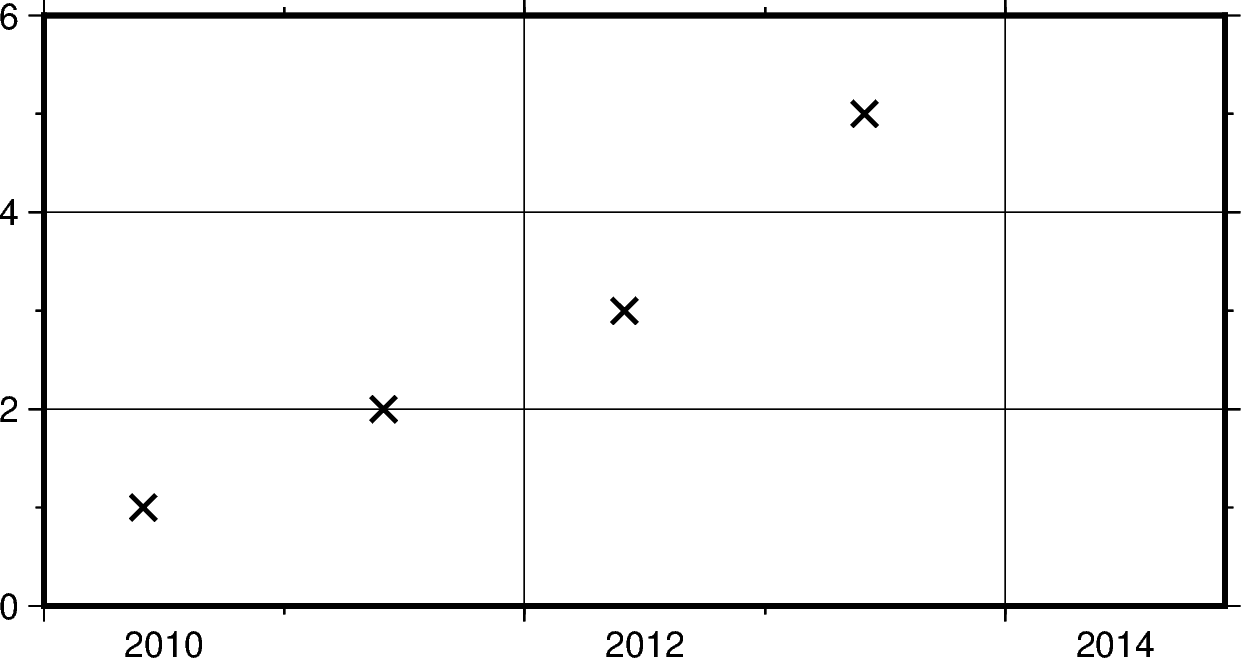

In [2]:
# Using Python's datetime
x = [
    datetime.date(2010, 6, 1),
    datetime.date(2011, 6, 1),
    datetime.date(2012, 6, 1),
    datetime.date(2013, 6, 1),
]
y = [1, 2, 3, 5]

fig = pygmt.Figure()
fig.plot(
    projection="X10c/5c",
    region=[datetime.date(2010, 1, 1), datetime.date(2014, 12, 1), 0, 6],
    frame=["WSen", "afg"], x=x, y=y,
    style="x0.3c", pen="1p",
)
fig.show()

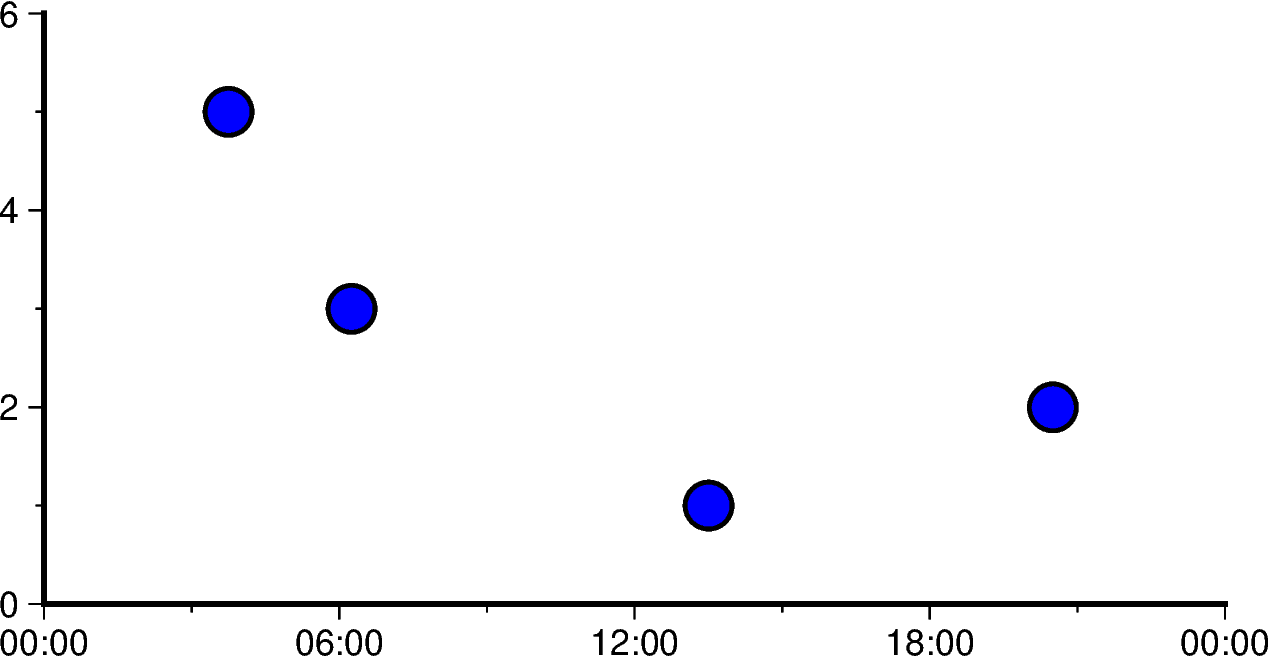

In [3]:
# Creating the `region` parameter & data points with both date and time information
x = [
    datetime.datetime(2021, 1, 1, 3, 45, 1),
    datetime.datetime(2021, 1, 1, 6, 15, 1),
    datetime.datetime(2021, 1, 1, 13, 30, 1),
    datetime.datetime(2021, 1, 1, 20, 30, 1),
]
y = [5, 3, 1, 2]

fig = pygmt.Figure()
fig.plot(
    projection="X10c/5c",
    region=[
        datetime.datetime(2021, 1, 1, 0, 0, 0),
        datetime.datetime(2021, 1, 2, 0, 0, 0),
        0,
        6,
    ],
    frame=["WS", "af"], x=x, y=y,
    style="c0.4c", pen="1p", color="blue",
)
fig.show()

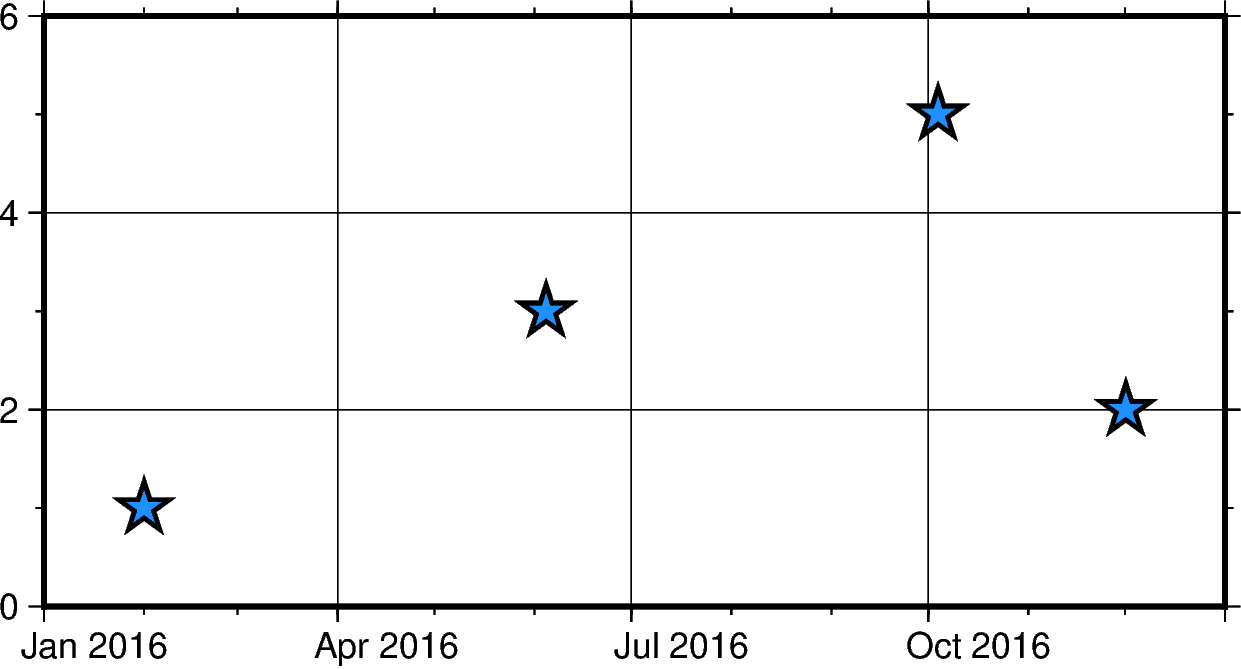

In [4]:
# Using ISO format
x = ["2016-02-01", "2016-06-04T14", "2016-10-04T00:00:15", "2016-12-01T05:00:15"]
y = [1, 3, 5, 2]
fig = pygmt.Figure()
fig.plot(
    projection="X10c/5c",
    region=["2016-01-01", "2017-01-1", 0, 6],
    frame=["WSen", "afg"], x=x, y=y,
    style="a0.45c", pen="1p", color="dodgerblue",
)
fig.show()

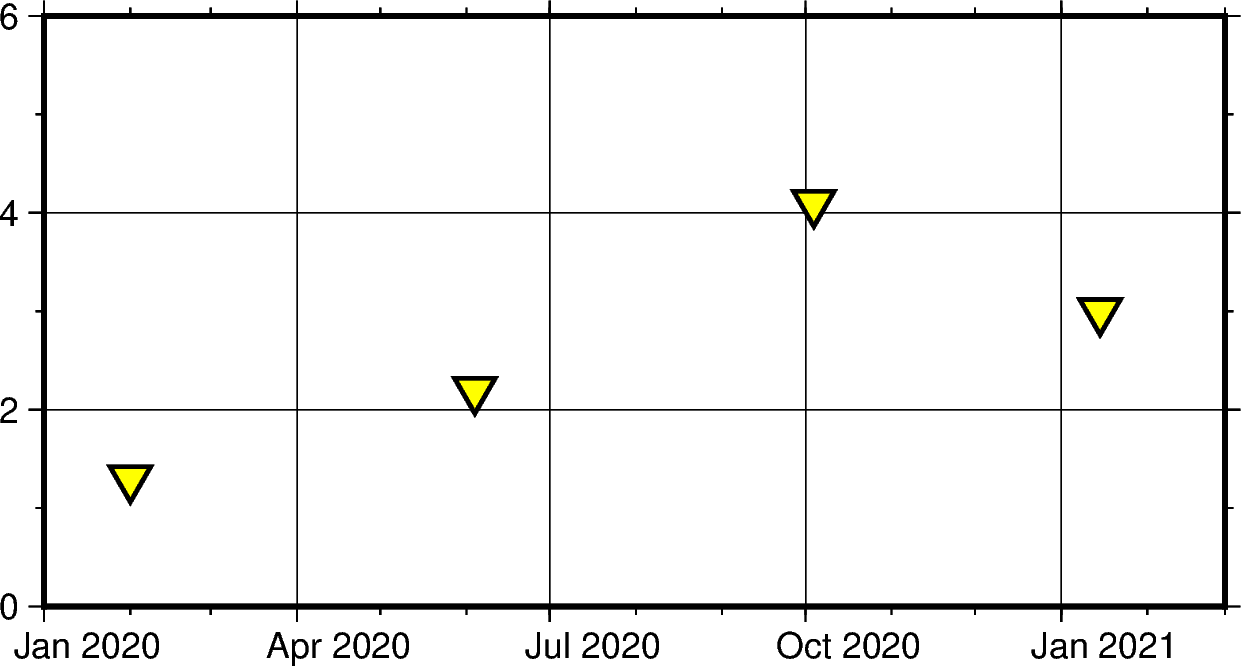

In [5]:
# Mixing and matching Python `datetime` and ISO dates
x = ["2020-02-01", "2020-06-04", "2020-10-04", datetime.datetime(2021, 1, 15)]
y = [1.3, 2.2, 4.1, 3]
fig = pygmt.Figure()
fig.plot(
    projection="X10c/5c",
    region=[datetime.datetime(2020, 1, 1), datetime.datetime(2021, 3, 1), 0, 6],
    frame=["WSen", "afg"], x=x, y=y,
    style="i0.4c", pen="1p", color="yellow",
)
fig.show()

DatetimeIndex(['2018-04-02', '2018-07-02', '2018-10-01', '2019-01-01',
               '2019-04-01', '2019-07-01', '2019-10-01'],
              dtype='datetime64[ns]', freq='BQS-JAN')


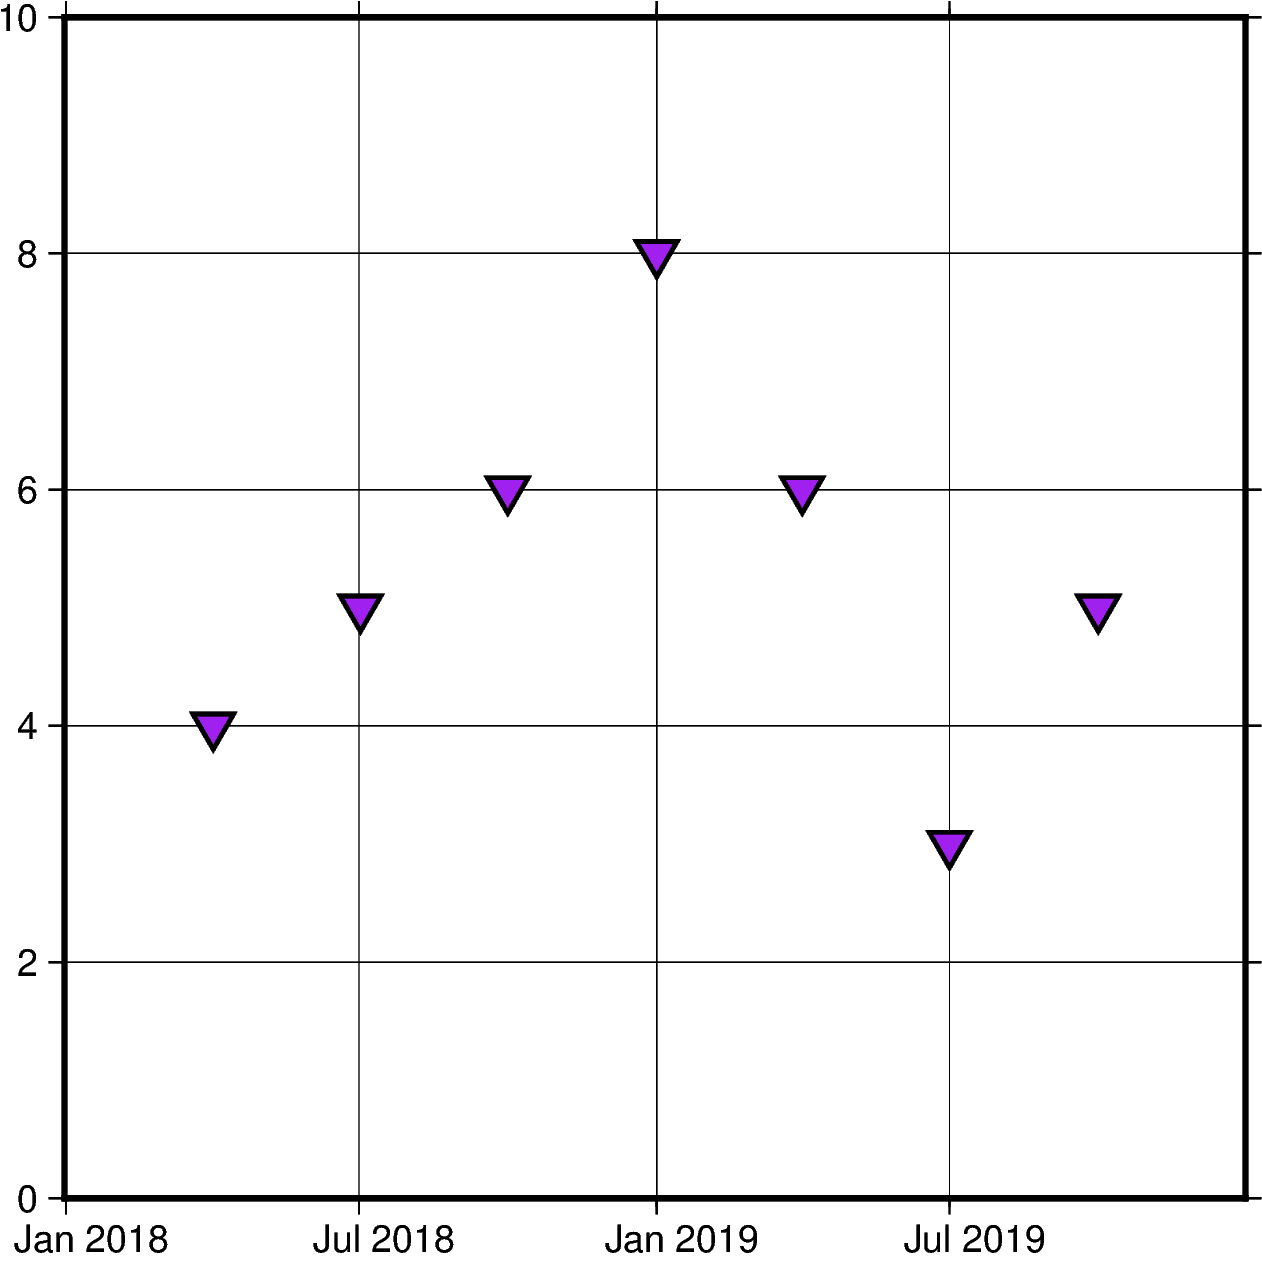

In [6]:
# Using `pandas.date_range`
# https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases
x = pd.date_range("2018-03-01", periods=7, freq="BQS")
y = [4, 5, 6, 8, 6, 3, 5]

# Business Quarter Start Frequency
print(x)

fig = pygmt.Figure()
fig.plot(
    projection="X10c/10c",
    region=[datetime.datetime(2017, 12, 31), datetime.datetime(2019, 12, 31), 0, 10],
    frame=["WSen", "ag"],
    x=x,
    y=y,
    style="i0.4c",
    pen="1p",
    color="purple",
)
fig.show()

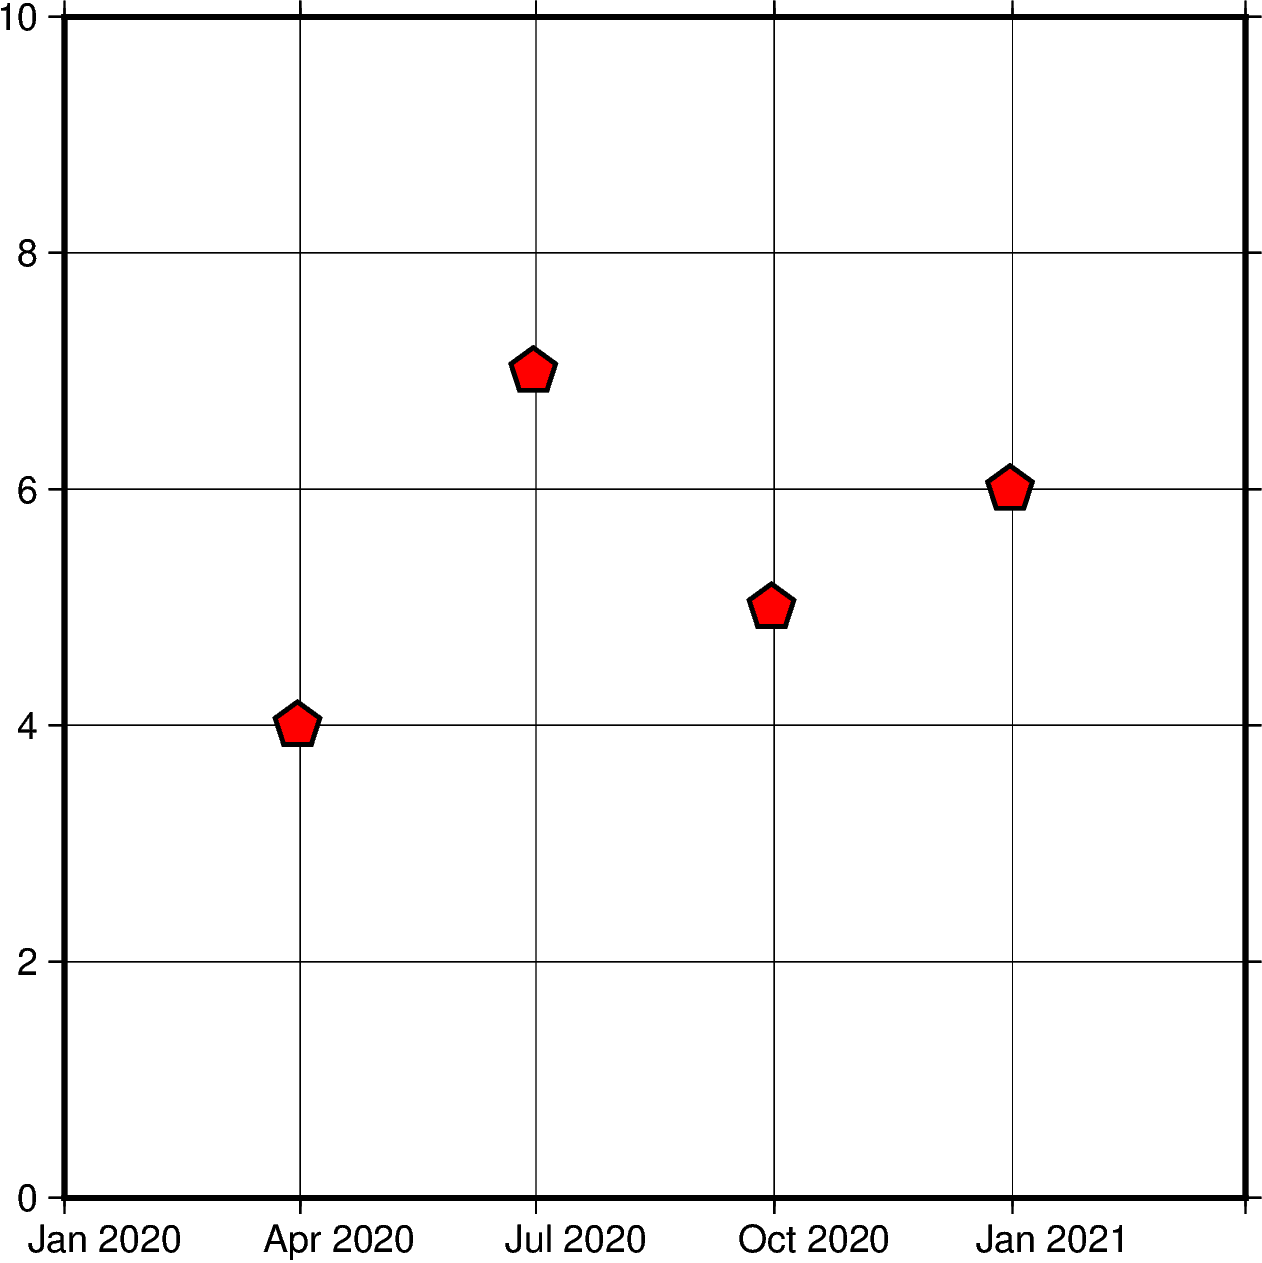

In [7]:
# Using `xarray.DataArray`
x = xr.DataArray(data=pd.date_range(start="2020-01-01", periods=4, freq="Q"))
y = [4, 7, 5, 6]

fig = pygmt.Figure()
fig.plot(
    projection="X10c/10c",
    region=[datetime.datetime(2020, 1, 1), datetime.datetime(2021, 4, 1), 0, 10],
    frame=["WSen", "ag"],
    x=x,
    y=y,
    style="n0.4c",
    pen="1p",
    color="red",
)
fig.show()

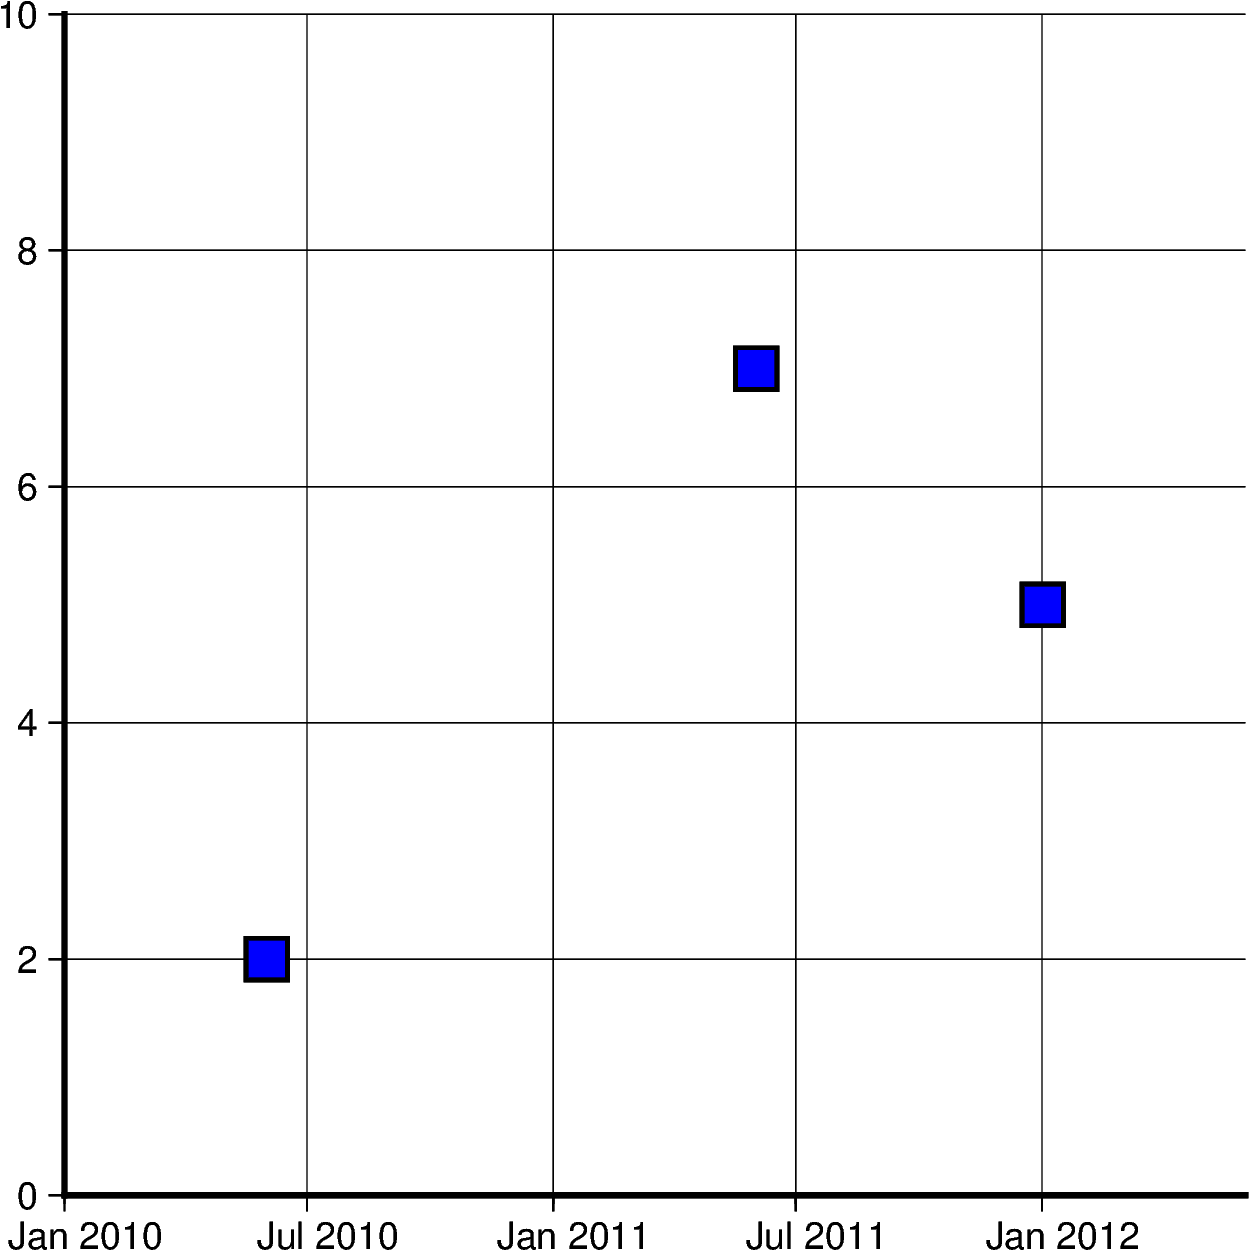

In [8]:
# Using `numpy.datetime64`
x = np.array(["2010-06-01", "2011-06-01T12", "2012-01-01T12:34:56"], dtype="datetime64")
y = [2, 7, 5]

fig = pygmt.Figure()
fig.plot(
    projection="X10c/10c",
    region=[datetime.datetime(2010, 1, 1), datetime.datetime(2012, 6, 1), 0, 10],
    frame=["WS", "ag"],
    x=x,
    y=y,
    style="s0.5c",
    pen="1p",
    color="blue",
)
fig.show()

['2020-07-11T23:56:40' '2020-07-29T00:05:00' '700' '2100']
17 days 00:08:20


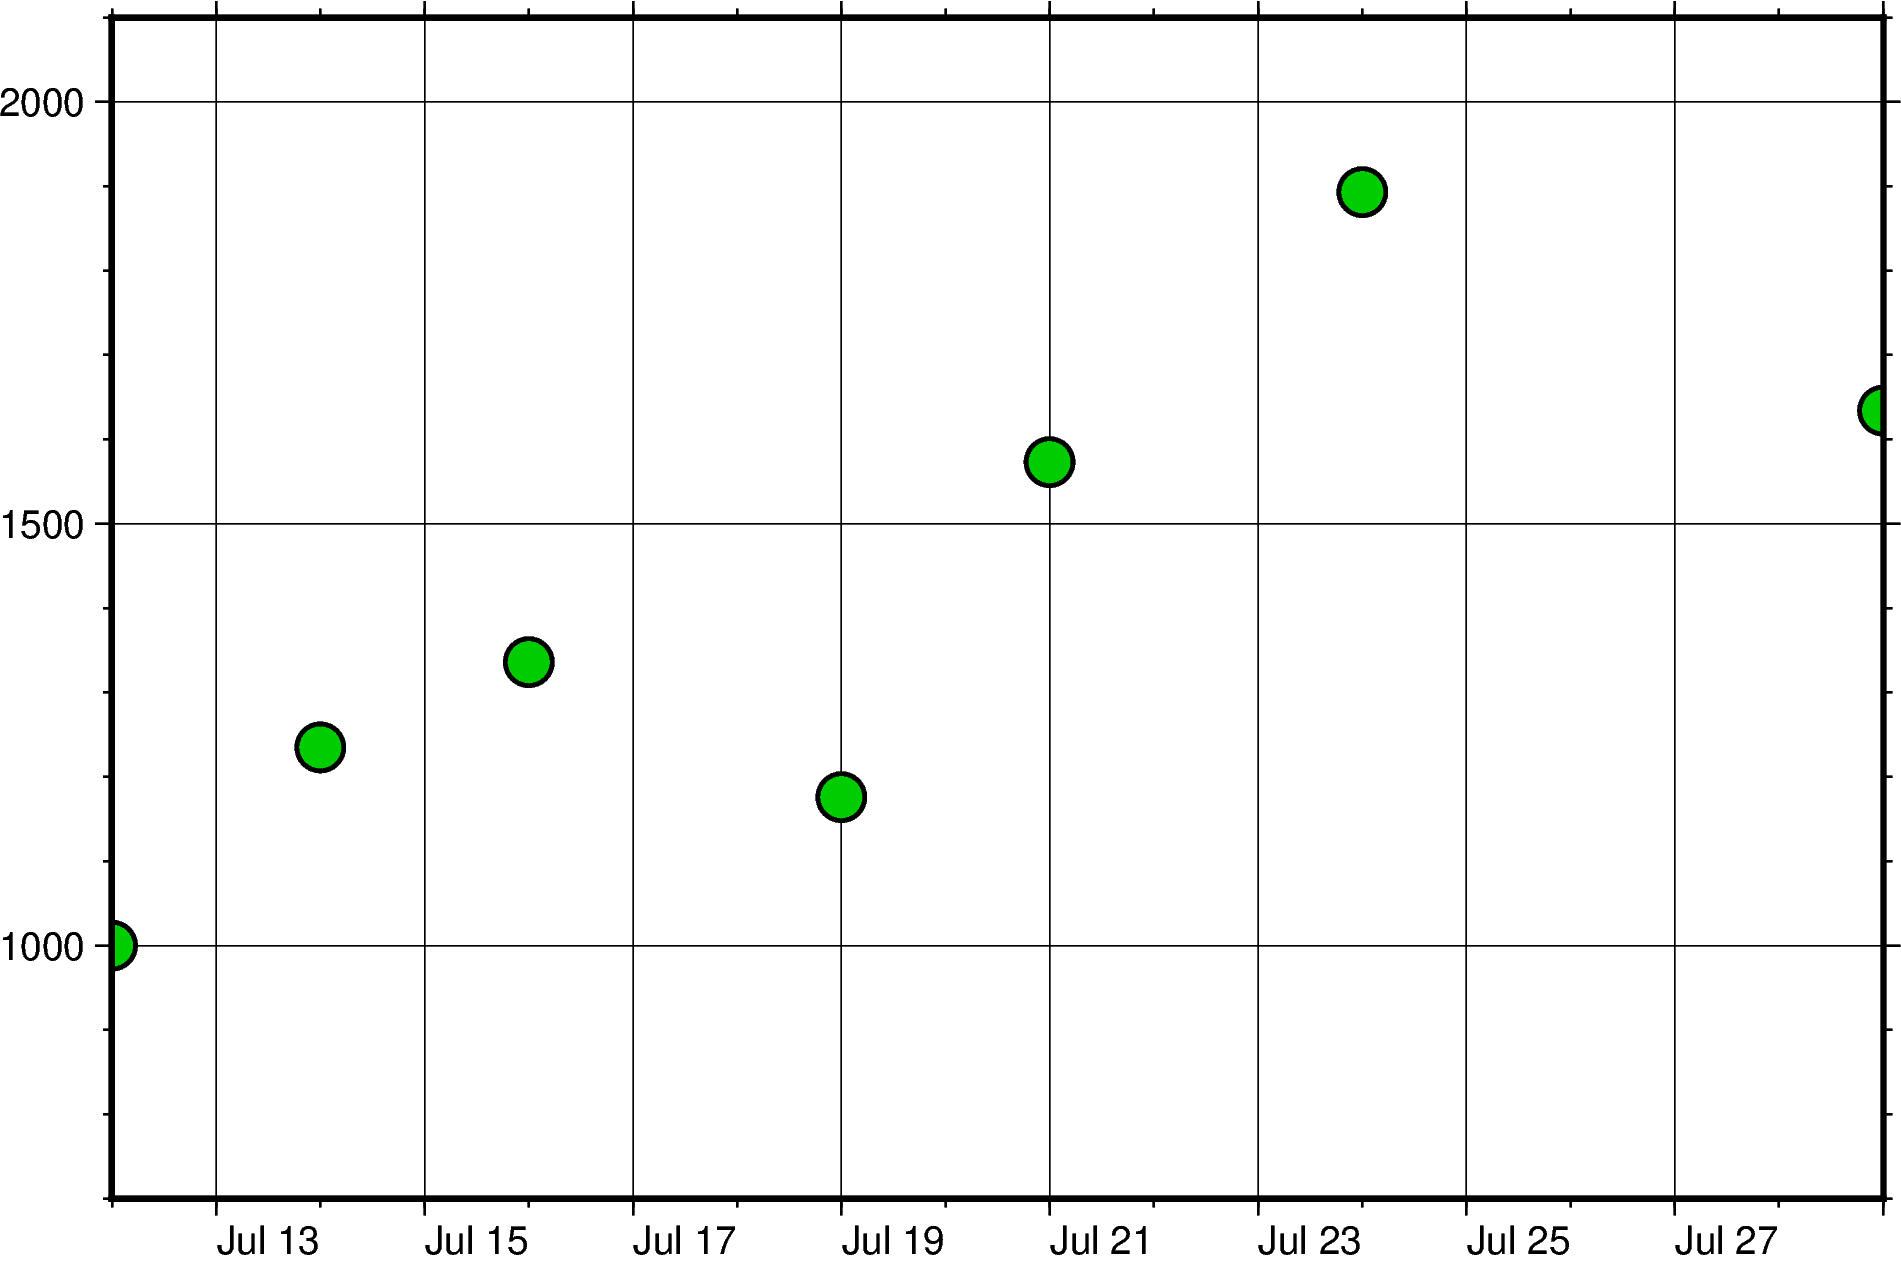

In [9]:
data = [
    ["20200712", 1000],
    ["20200714", 1235],
    ["20200716", 1336],
    ["20200719", 1176],
    ["20200721", 1573],
    ["20200724", 1893],
    ["20200729", 1634],
]
df = pd.DataFrame(data, columns=["Date", "Score"])
df.Date = pd.to_datetime(df["Date"], format="%Y%m%d")

fig = pygmt.Figure()

# Generating an Automatic region
region = pygmt.info(
    data=df[["Date", "Score"]], per_column=True, spacing=(700, 700), coltypes="T"
)

# Timedelta('17 days 00:08:20') = 1469300 seconds = 2099 * 700
# As can be seen, the region is made wrt 700 seconds being the nearest multiple
print(region)
print(pd.to_datetime('2020-07-29T00:05:00') - pd.to_datetime('2020-07-11T23:56:40'))

fig.plot(
    region=region,
    projection="X15c/10c",
    frame=["WSen", "afg"],
    x=df.Date, y=df.Score,
    style="c0.4c", pen="1p", color="green3",
)

fig.show()

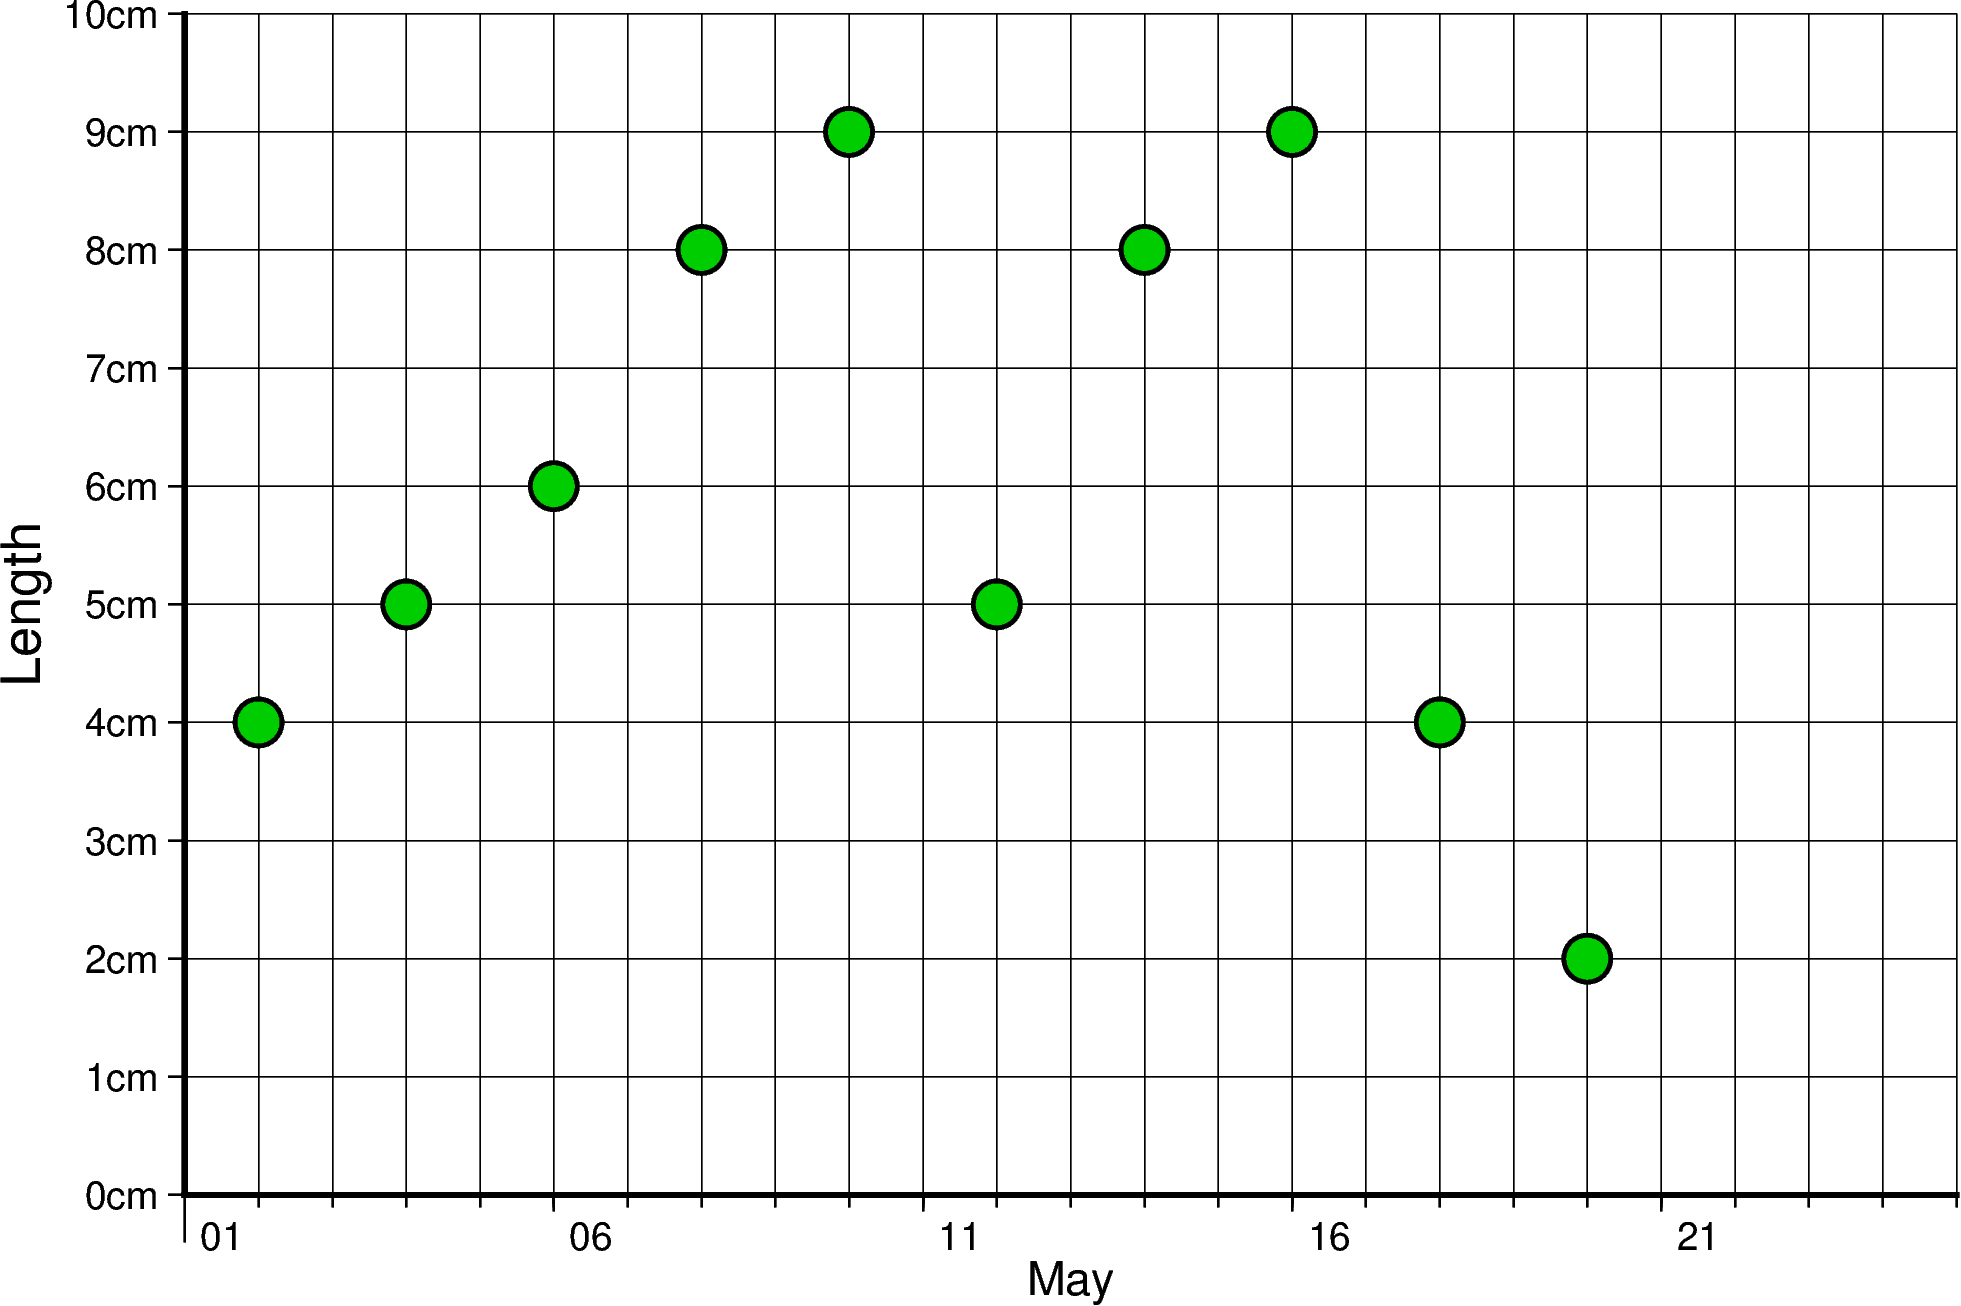

In [10]:
# Setting primary and secondary time axes
# Labeling the axes and setting the intervals at which the labels are expected to appear
x = pd.date_range("2013-05-02", periods=10, freq="2D")
y = [4, 5, 6, 8, 9, 5, 8, 9, 4, 2]

# These modifications are added to the `frame` parameter
# `s` indicates secondary labelling and `p` indicates primary labelling
# `sxa10f1D`: Major tick spacing interval to one month (a1O)
#             Minor tick spacing interval to one day (f1D)

fig = pygmt.Figure()
with pygmt.config(FORMAT_DATE_MAP="o"):
  fig.plot(
    projection="X15c/10c",
    region=[datetime.datetime(2013, 5, 1), datetime.datetime(2013, 5, 25), 0, 10],
    frame=["WS", "sxa1Of1D", "pxa5d", "sy+lLength", "pya1+ucm", "g"],
    x=x, y=y,
    style="c0.4c", pen="1p", color="green3",
  )

fig.show()

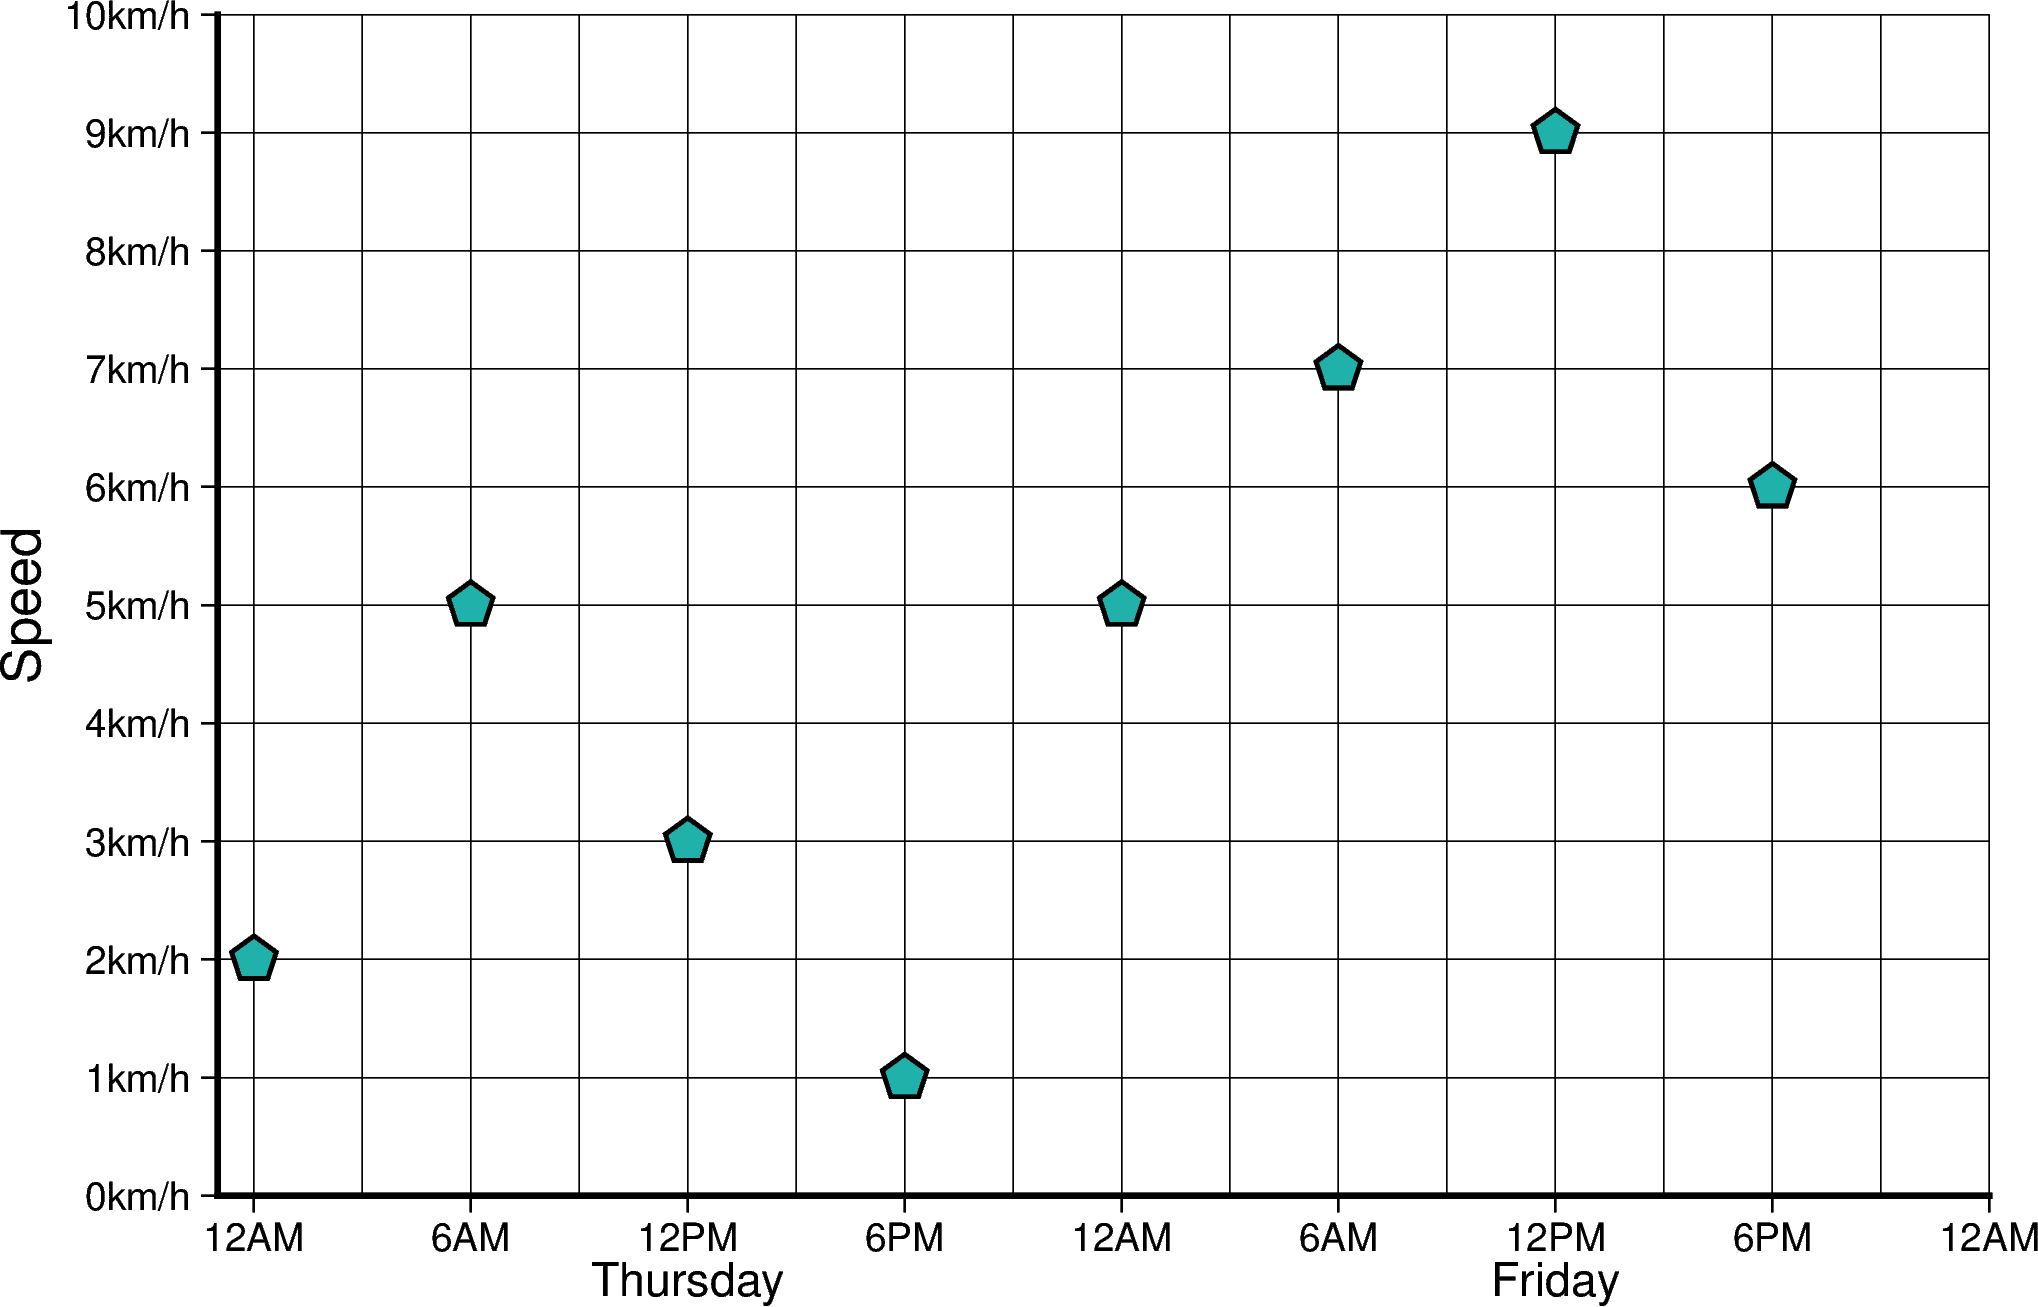

In [11]:
# Another example of the same concept
x = pd.date_range("2021-04-15", periods=8, freq="6H")
y = [2, 5, 3, 1, 5, 7, 9, 6]

fig = pygmt.Figure()
with pygmt.config(FORMAT_CLOCK_MAP="-hhAM"):
  fig.plot(
    projection="X15c/10c",
    region=[
      datetime.datetime(2021, 4, 14, 23, 0, 0),
      datetime.datetime(2021, 4, 17),
      0,
      10,
    ],
    frame=["WS", "sxa1K", "pxa6H", "sy+lSpeed", "pya1+ukm/h", "g"],
    x=x, y=y,
    style="n0.4c", pen="1p", color="lightseagreen",
  )
fig.show()